In [12]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import struct
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import InputLayer, Reshape, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

In [3]:
def load_mnist(images_path, labels_path):
    with open(labels_path, 'rb') as lbpath:
        magic, num = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 1, rows, cols)

    return images, labels

In [6]:
train_images, train_labels = load_mnist('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')
test_images, test_labels = load_mnist('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte')

# Verileri normalleştirin
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

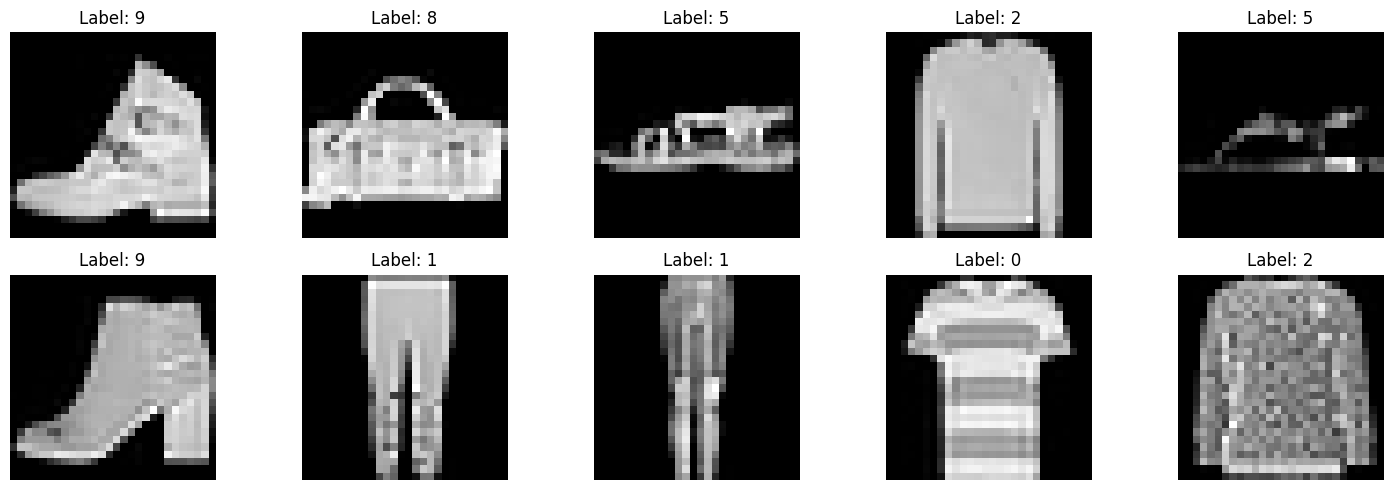

In [8]:
# Rastgele 10 görüntü seçelim
num_images = 10
indices = np.random.choice(train_images.shape[0], num_images, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # 2 satır, 5 sütun
    plt.imshow(train_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {train_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
# verisetinde kaç sınıf görüntü var
unique_classes = np.unique(train_labels)
num_classes = len(unique_classes)

print(f'Eğitim verisinde {num_classes} farklı sınıf var: {unique_classes}')

Eğitim verisinde 10 farklı sınıf var: [0 1 2 3 4 5 6 7 8 9]


In [21]:
# Eğitim ve test görüntülerini yeniden şekillendirin
train_images = train_images.reshape(-1, 28, 28, 1)  # (batch_size, height, width, channels)
test_images = test_images.reshape(-1, 28, 28, 1)

In [22]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
history = model.fit(train_images, train_labels, validation_split=0.10, epochs=50, verbose=1)

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.6976 - loss: 0.8974 - val_accuracy: 0.7883 - val_loss: 0.5440
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8492 - loss: 0.4383 - val_accuracy: 0.8788 - val_loss: 0.3227
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8790 - loss: 0.3575 - val_accuracy: 0.8947 - val_loss: 0.2935
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8937 - loss: 0.3130 - val_accuracy: 0.8987 - val_loss: 0.2700
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9054 - loss: 0.2833 - val_accuracy: 0.9090 - val_loss: 0.2504
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9089 - loss: 0.2670 - val_accuracy: 0.8988 - val_loss: 0.2844
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9162 - loss: 0.2521 - val_accuracy: 0.9143 - val_loss: 0.2452
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9253 - loss: 0.2244 -

In [24]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,436,384 (5.48 MB)

 Trainable params: 478,538 (1.83 MB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 957,078 (3.65 MB)

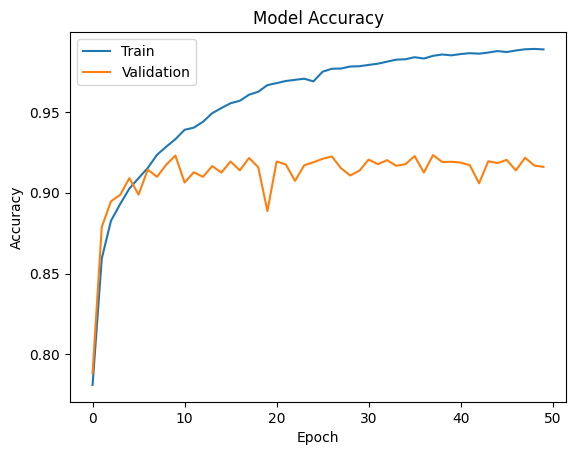

In [25]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()